# Higgs basis of the 2HDM

First, we write the potential of the 2HDM in term of common notation. In this standard basis, $\Phi_1$ and $\Phi_2$ has a vev.

In [24]:
from sympy import symbols, init_printing, cos, sin, simplify, factor
from sympy.physics.quantum import Dagger, Operator
init_printing()

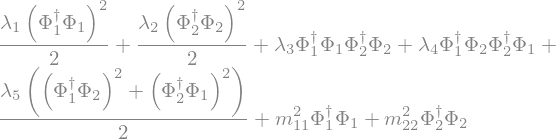

In [13]:
Φ1 = Operator(r'\Phi_1')
Φ2 = Operator(r'\Phi_2')
m11, m22, λ1, λ2, λ3, λ4, λ5 = symbols(
    r'm_{11}, m_{22}, \lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5',real=True)
A = Dagger(Φ1)*Φ1
B = Dagger(Φ2)*Φ2
C = Dagger(Φ1)*Φ2
D = Dagger(Φ2)*Φ1

Vo = m11**2*A + m22**2*B + (λ1/2)*A**2 + (λ2/2)*B**2 + λ3*A*B + λ4*C*D + (λ5/2)*(C**2 + D**2)
Vo

Now, we consider a rotation of in the Higgs flavor space given by 
$$
\begin{pmatrix}
H_1\\
H_2
\end{pmatrix} =
\begin{pmatrix}
c_{\theta}& s_{\theta}\\
-s_{\theta}& c_{\theta}
\end{pmatrix}
\begin{pmatrix}
\Phi_1\\
\Phi_2
\end{pmatrix}.
$$
Then if we rewrite the $Vo$ in terms of the new higgs doublets $H_1$ and $H_2$

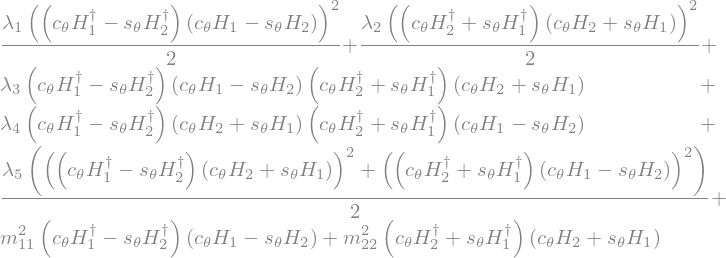

In [27]:
H1 = Operator('H_1')
H2 = Operator('H_2')
cθ, sθ = symbols(r'c_\theta, s_\theta',real=True)
cambioΦ = {Φ1:cθ*H1 - sθ*H2,
           Φ2:sθ*H1 + cθ*H2}
Vn = Vo.subs(cambioΦ)
Vn

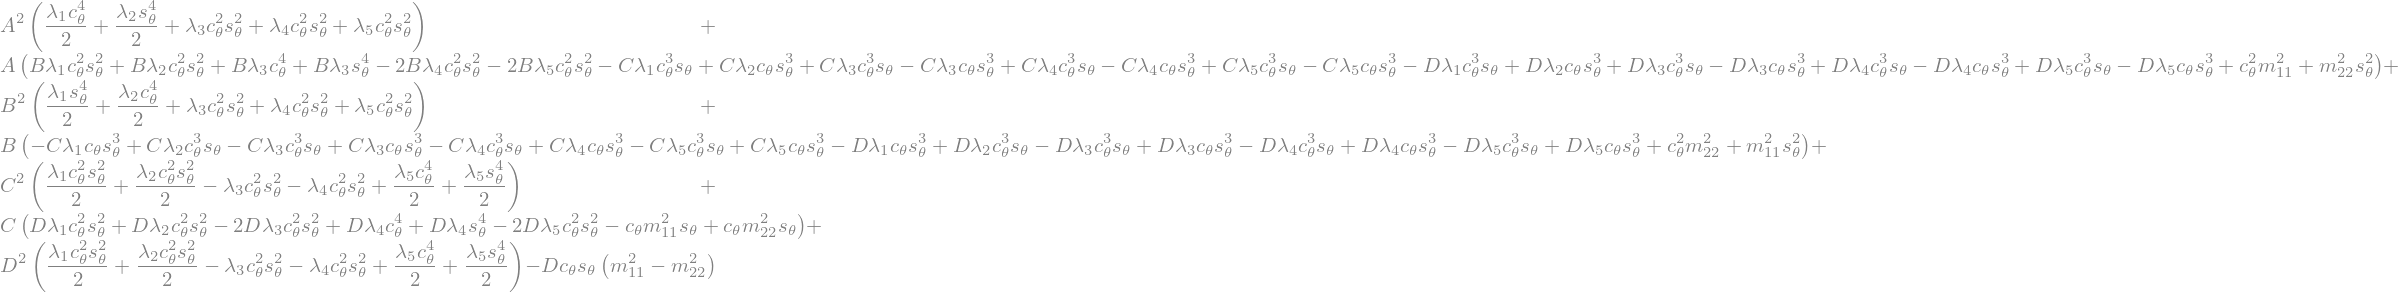

In [60]:
An = Dagger(H1)*H1
Bn = Dagger(H2)*H2
Cn = Dagger(H1)*H2
Dn = Dagger(H2)*H1

An2 = Dagger(H1)*H1*Dagger(H1)*H1
Bn2 = Dagger(H2)*H2*Dagger(H2)*H2
Cn2 = Dagger(H1)*H2*Dagger(H1)*H2
Dn2 = Dagger(H2)*H1*Dagger(H2)*H1

ABn = An*Bn
CDn = Cn*Dn

A,B,C,D = symbols('A,B,C,D')
cambioX = {An:A,Bn:B,Cn:C,Dn:D}
cambioX2 = {An2:A**2,Bn2:B**2,Cn2:C**2,Dn2:D**2}
cambioXY = {ABn:A*B, CDn:C*D}
Vn.expand().subs(cambioX2).subs(cambioXY).subs(cambioX).expand().collect(
    [A, B, C, D],simplify).simplify()#.collect([A*B,C*D])